# Data Analysis and Price Prediction of Electric Vehicles

## Overview of Electric Vehicle Sector

The supply of fossil fuels is constantly decreasing. The situation is very alarming. It is time for the world to slowly adapt to electric vehicles. A lot of change needs to happen. Major carmakers like Tesla and Porsche manufacture many electric vehicles. The improvement of battery technology in recent years has led to the higher popularity of electric vehicles. Buying an electric vehicle can be a great choice for consumers. The drive quality, low noise levels, and convenience are really great. In the United States, one year of driving a petrol car can cost from 1500 USD to 2500 USD. On the other hand, the driving cost of Electric Vehicles is 500 USD. Electric cars are more preferable. The maintenance cost of electric vehicles is also very low. They are economical to maintain. The energy conversion efficiency of electric vehicles is also high. Electric vehicles use 60-70% of electrical energy. On the other hand, vehicles based on internal combustion engines have an efficiency of 18-22% only.

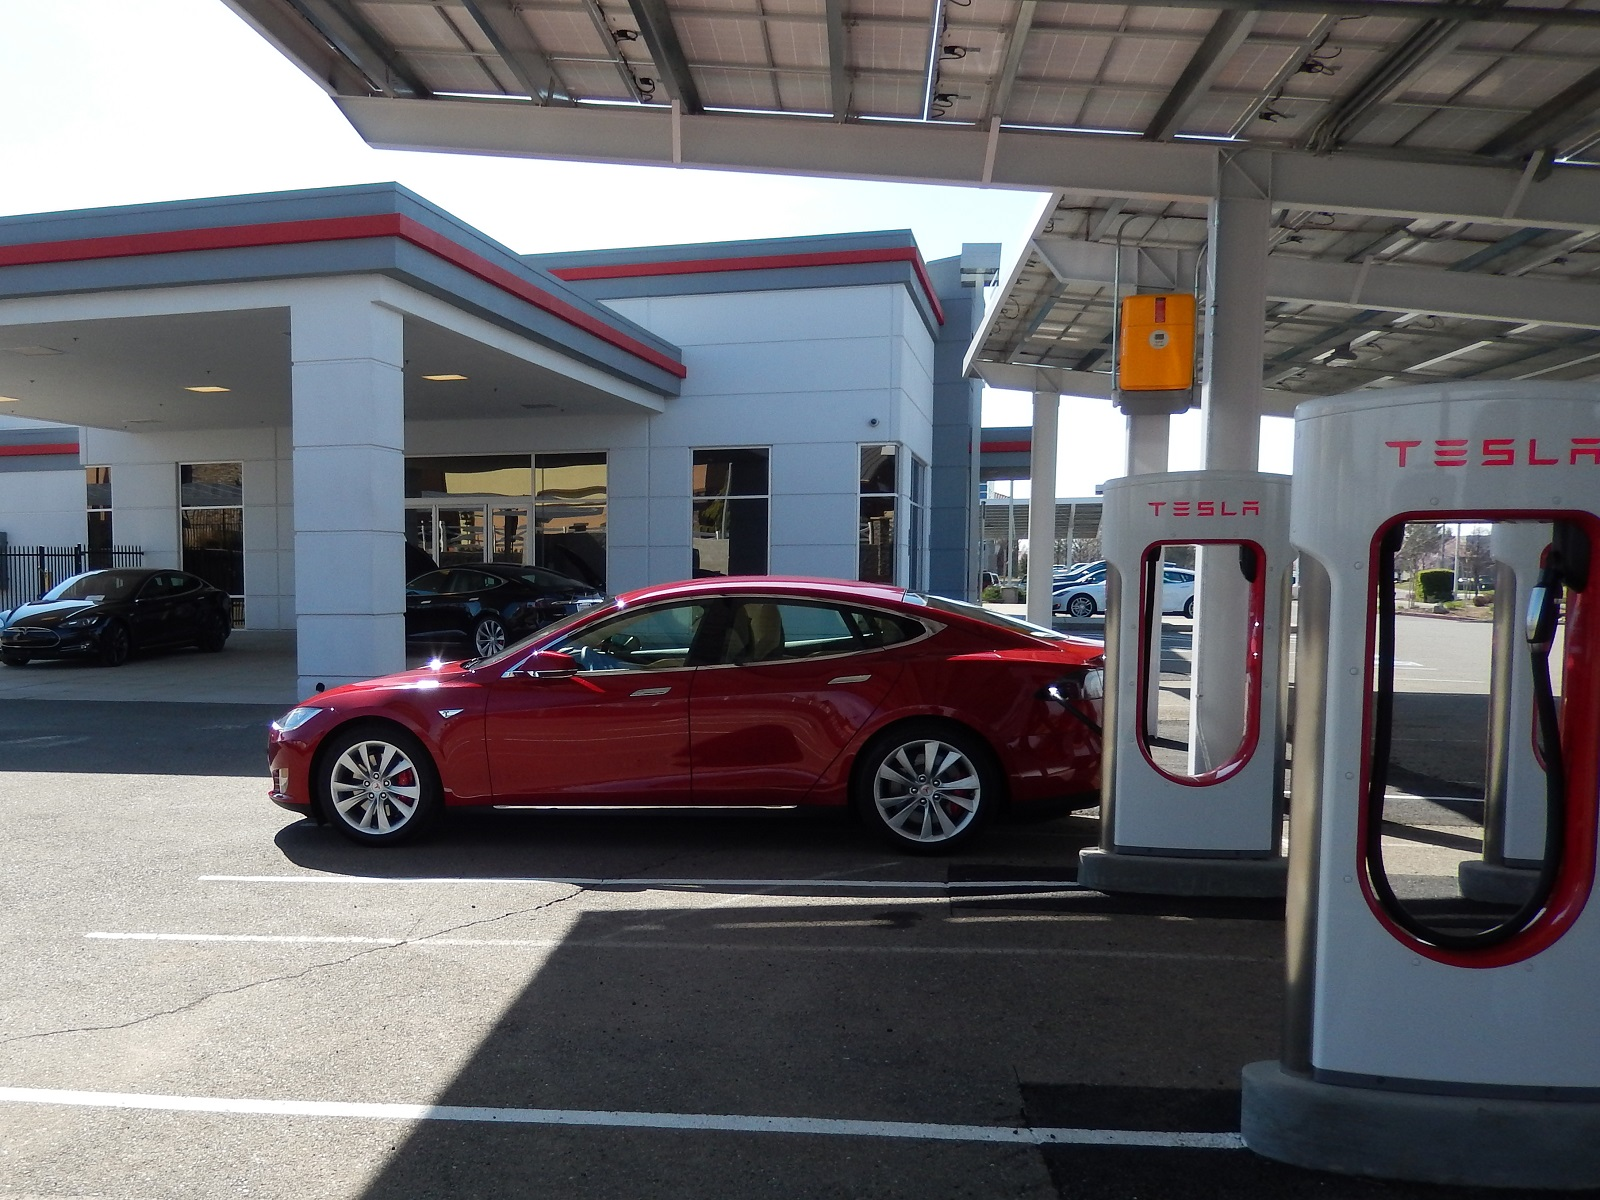

Electric vehicles are made for the future and will be a big innovation. They are good for the environment and they do not emit any greenhouse gases.

There are, however, many challenges associated with electric vehicles. They have a limited range. Charging the vehicle takes time and can be a hassle sometimes. The availability of charging stations is also a big issue. Incompatibility of charging stations can also be a problem. Despite many challenges and issues, switching to electric vehicles is good for the environment and is more economically viable in the long term. Many have predicted that, by 2040, most of the vehicles will be electric. Rising fossil fuel costs and high maintenance costs of petrol and diesel vehicles coupled with environmental concerns are the main reasons. Many developed countries have given incentives for purchasing electric vehicles. Automobile manufacturers are already manufacturing some impressive electric vehicles.

The energy cost of manufacturing an electric vehicle is also very high, but considering everything and the fact that charging electric vehicles is very cheap, EVs are a great option. Manufacturing batteries is an important task in the production of Electric vehicles.

### Analyzing some data related to various popular electric vehicles available in the European Market.

## Electric Vehicle Data

       1. Vehicle Battery capacity (in KWH)
       2. Acceleration (0-100) in Seconds
       3. Top Speed in Km/hr
       4. Range of Vehicle in km
       5. The efficiency of Vehicle in Wh/km
       6. Fast charge speed in km/hr
       7. Drive Configuration
       8. Number of seats
       9. Price in Germany (Euro)
      10. Price in the UK (Pound)

Data Source on Kaggle: https://www.kaggle.com/kkhandekar/cheapest-electric-cars

The data consists of 180 vehicles and there are some missing values as well. We can conduct various data analytics visualizations to understand the data and information. This gives us an idea about the market as a whole and overall data distribution. Often, this type of data gives insight into the market and lets businesses conduct market research. The electric vehicle market is growing at a fast pace, with proper investment and research, the field can be improved and a higher level of efficiency can be achieved.

In [1]:
# import some basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cheapestelectriccars-EVDatabase.csv")

In [3]:
df.head()

Name  \
0                    Opel Ampera-e    
1         Renault Kangoo Maxi ZE 33   
2                      Nissan Leaf    
3  Audi e-tron Sportback 55 quattro   
4            Porsche Taycan Turbo S   

                                    Subtitle Acceleration  TopSpeed   Range  \
0   Battery Electric Vehicle |       58 kWh       7.3 sec  150 km/h  335 km   
1   Battery Electric Vehicle |       31 kWh      22.4 sec  130 km/h  160 km   
2   Battery Electric Vehicle |       36 kWh       7.9 sec  144 km/h  220 km   
3  Battery Electric Vehicle |       86.5 kWh      5.7 sec  200 km/h  375 km   
4  Battery Electric Vehicle |       83.7 kWh      2.8 sec  260 km/h  390 km   

  Efficiency FastChargeSpeed              Drive  NumberofSeats PriceinGermany  \
0  173 Wh/km        210 km/h  Front Wheel Drive              5        €42,990   
1  194 Wh/km               -  Front Wheel Drive              5            NaN   
2  164 Wh/km        230 km/h  Front Wheel Drive              5        €29,990   
3  231 Wh/km        600 km/h    All Wheel Drive              5            NaN   
4  215 Wh/km        860 km/h    All Wheel Drive              4       €186,336   

  PriceinUK  
0       NaN  
1   £31,680  
2   £25,995  
3   £79,900  
4  £138,830

## Exploratory Data Analysis

In [4]:
df.columns.tolist()

['Name',
 'Subtitle',
 'Acceleration',
 'TopSpeed',
 'Range',
 'Efficiency',
 'FastChargeSpeed',
 'Drive',
 'NumberofSeats',
 'PriceinGermany',
 'PriceinUK']

There are a lot of missing values in the data, so now let us fill the missing data with zero initially.

In [5]:
#filling empty data with 0
df=df.fillna('0')

In [7]:
# get the name of the car manufacturer from the car name.
df['Manufacturer'] = df.Name.str.split(' ', 1, expand=True)[0]

C:\Users\Lakshmi Kant\AppData\Local\Temp\ipykernel_18588\916163022.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Manufacturer'] = df.Name.str.split(' ', 1, expand=True)[0]


In [8]:
#cleaning the data
#removing currency sign
PriceinUK=[]
for item in df['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
df['PriceinUK']=PriceinUK

In [9]:
PriceinGermany=[]
for item in df['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
df['PriceinGermany']=PriceinGermany

In [10]:
# Now, prepare the data for Fast Charging Speed.
FastChargeSpeed=[]
for item in df['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
df['FastChargeSpeed']=FastChargeSpeed

These types of data cleaning and data preparation methods are unique and different for various different types of data. Next, proceed to prepare the data for efficiency.

In [11]:
Efficiency=[]
for item in df['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
df['Efficiency']=Efficiency

Similarly, Let's do the data cleaning and preparation for other parameters.

In [12]:
Range=[]
for item in df['Range']:
    Range+=[int(item.replace(' km',''))]
df['Range']=Range

TopSpeed=[]
for item in df['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
df['TopSpeed']=TopSpeed

Acceleration=[]
for item in df['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
df['Acceleration']=Acceleration

Subtitle=[]
for item in df['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
df['Subtitle']=Subtitle

In [13]:
df= df.rename(columns = {'Subtitle':'KWH'})

Now, the data preparation is done. Now, focus on having a look at the data and data analysis.

In [14]:
df.head()

Name   KWH  Acceleration  TopSpeed  Range  \
0                    Opel Ampera-e   58.0           7.3       150    335   
1         Renault Kangoo Maxi ZE 33  31.0          22.4       130    160   
2                      Nissan Leaf   36.0           7.9       144    220   
3  Audi e-tron Sportback 55 quattro  86.5           5.7       200    375   
4            Porsche Taycan Turbo S  83.7           2.8       260    390   

   Efficiency  FastChargeSpeed              Drive  NumberofSeats  \
0         173              210  Front Wheel Drive              5   
1         194                0  Front Wheel Drive              5   
2         164              230  Front Wheel Drive              5   
3         231              600    All Wheel Drive              5   
4         215              860    All Wheel Drive              4   

   PriceinGermany  PriceinUK Manufacturer  
0           42990          0         Opel  
1               0      31680      Renault  
2           29990      25995       Nissan  
3               0      79900         Audi  
4          186336     138830      Porsche

In [15]:
# Shape of the dataset
df.shape

(180, 12)

In [16]:
# Print the name of columns
df.columns

Index(['Name', 'KWH', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK', 'Manufacturer'],
      dtype='object')

In [17]:
# Check for NULL Values
df.isnull().sum()

Name               0
KWH                0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     0
PriceinUK          0
Manufacturer       0
dtype: int64

In [18]:
# Check unique values
df.nunique()

Name               174
KWH                 61
Acceleration        77
TopSpeed            35
Range               68
Efficiency          80
FastChargeSpeed     69
Drive                3
NumberofSeats        4
PriceinGermany     152
PriceinUK          124
Manufacturer        37
dtype: int64

In [19]:
# Check for Duplicate values
df.duplicated().sum()

0

In [20]:
# the nature of the data and the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


We can see that majority of the data is numeric. It is either float or integer, and 3 columns contain text data.

In [21]:
# Describe of the dataset
df.describe()

KWH  Acceleration    TopSpeed       Range  Efficiency  \
count  180.000000    180.000000  180.000000  180.000000  180.000000   
mean    65.263889      7.854444  176.400000  337.388889  194.272222   
std     24.952074      3.169465   42.096006  118.718078   32.684001   
min     16.700000      2.100000  123.000000   95.000000  104.000000   
25%     45.000000      5.575000  150.000000  258.750000  168.000000   
50%     66.500000      7.500000  160.000000  340.000000  188.500000   
75%     77.400000      9.625000  200.000000  400.000000  215.250000   
max    200.000000     22.400000  410.000000  970.000000  281.000000   

       FastChargeSpeed  NumberofSeats  PriceinGermany      PriceinUK  
count       180.000000     180.000000      180.000000     180.000000  
mean        467.888889       5.166667    54810.361111   39998.400000  
std         252.128346       0.971666    34852.347982   33768.589005  
min           0.000000       2.000000        0.000000       0.000000  
25%         280.000000       5.000000    35425.000000   19646.250000  
50%         420.000000       5.000000    49500.000000   37270.000000  
75%         590.000000       5.000000    62262.500000   55912.500000  
max        1410.000000       7.000000   215000.000000  189000.000000

In [22]:
# the correlation between the data.
df.corr()

C:\Users\Lakshmi Kant\AppData\Local\Temp\ipykernel_18588\604870780.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


KWH  Acceleration  TopSpeed     Range  Efficiency  \
KWH              1.000000     -0.622985  0.691415  0.890092    0.356426   
Acceleration    -0.622985      1.000000 -0.821041 -0.712077    0.140984   
TopSpeed         0.691415     -0.821041  1.000000  0.760319   -0.047383   
Range            0.890092     -0.712077  0.760319  1.000000   -0.072273   
Efficiency       0.356426      0.140984 -0.047383 -0.072273    1.000000   
FastChargeSpeed  0.659743     -0.741670  0.773190  0.767574   -0.059914   
NumberofSeats    0.134447      0.318302 -0.242567 -0.068851    0.602469   
PriceinGermany   0.598084     -0.501519  0.678865  0.569037    0.239221   
PriceinUK        0.621253     -0.674273  0.792669  0.620757    0.084527   

                 FastChargeSpeed  NumberofSeats  PriceinGermany  PriceinUK  
KWH                     0.659743       0.134447        0.598084   0.621253  
Acceleration           -0.741670       0.318302       -0.501519  -0.674273  
TopSpeed                0.773190      -0.242567        0.678865   0.792669  
Range                   0.767574      -0.068851        0.569037   0.620757  
Efficiency             -0.059914       0.602469        0.239221   0.084527  
FastChargeSpeed         1.000000      -0.119644        0.595609   0.650851  
NumberofSeats          -0.119644       1.000000       -0.012455  -0.211985  
PriceinGermany          0.595609      -0.012455        1.000000   0.698753  
PriceinUK               0.650851      -0.211985        0.698753   1.000000

## Data Visualization

C:\Users\Lakshmi Kant\AppData\Local\Temp\ipykernel_18588\2106362670.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

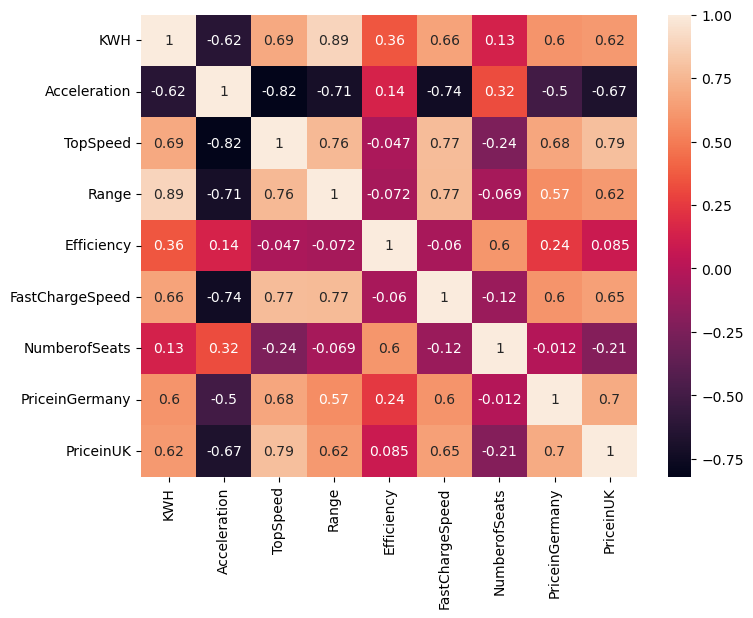

In [23]:
# the correlation better using a heat map.
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

The lighter the colour, the more the correlation between the two data points. For example, we can see that price in Germany and price in the UK have a correlation of “0.7”, which is a good score. So, the correlation data has many real-life similarities.

For example, Top Speed has a high correlation to price in Germany and price in the UK. So, it makes sense. A car that has a higher top speed will have a higher price. Similarly, vehicle range and KWH has a high correlation of 0.89, it is obvious as the battery capacity, more will be the range of the vehicle. The correlation heatmap is thus, a great way to understand which data columns are related to each other.

Other data visualisations and various types of plots can be made to visualise the data distribution and understand the whole data. Doing proper data exploration can help in the overall data-driven decision-making process.

<Axes: xlabel='Drive', ylabel='count'>

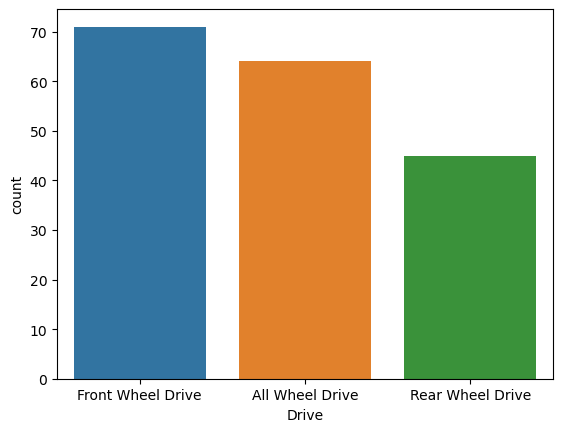

In [24]:
# the count of each type of drive for the vehicles.
sns.countplot(x = 'Drive', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

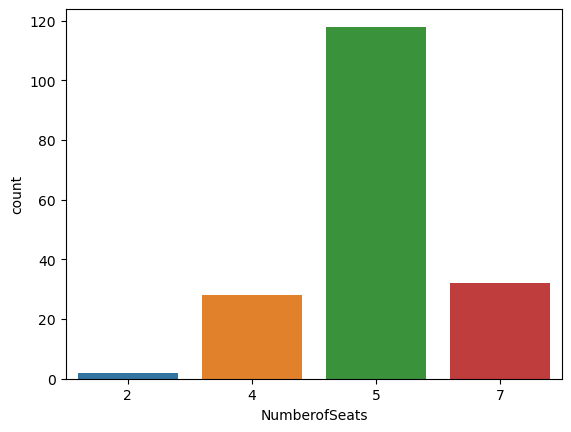

In [25]:
# the distribution of the number of seats.
sns.countplot(x = 'NumberofSeats', data = df)

<Axes: xlabel='NumberofSeats', ylabel='count'>

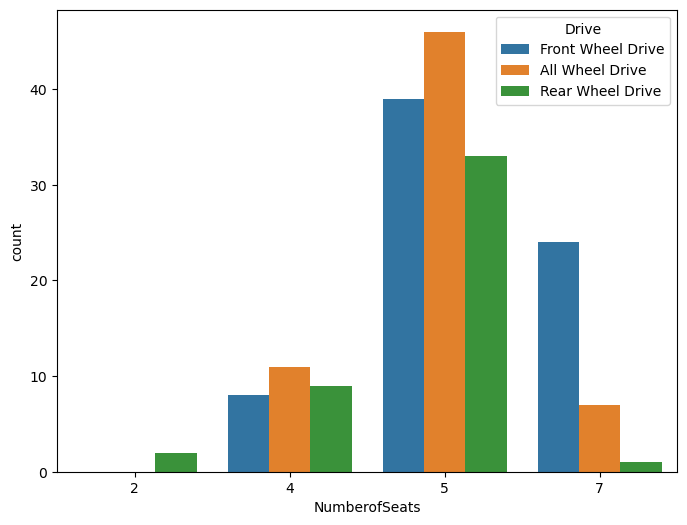

In [26]:
# the data distribution considering both, the number of seats and type of drive.
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=df)

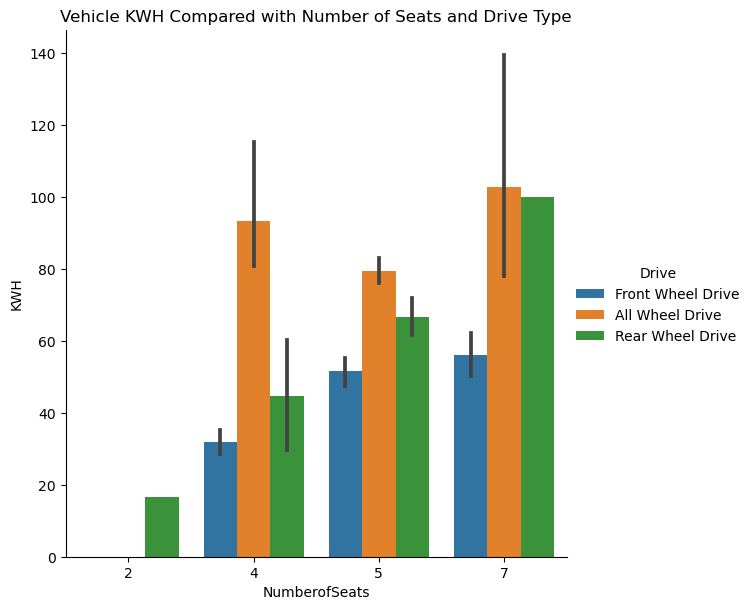

In [31]:
sns.catplot(data=df, kind="bar", x="NumberofSeats", y="KWH",height=6, hue="Drive")
plt.title("Vehicle KWH Compared with Number of Seats and Drive Type")
plt.show()

<Axes: xlabel='count', ylabel='Manufacturer'>

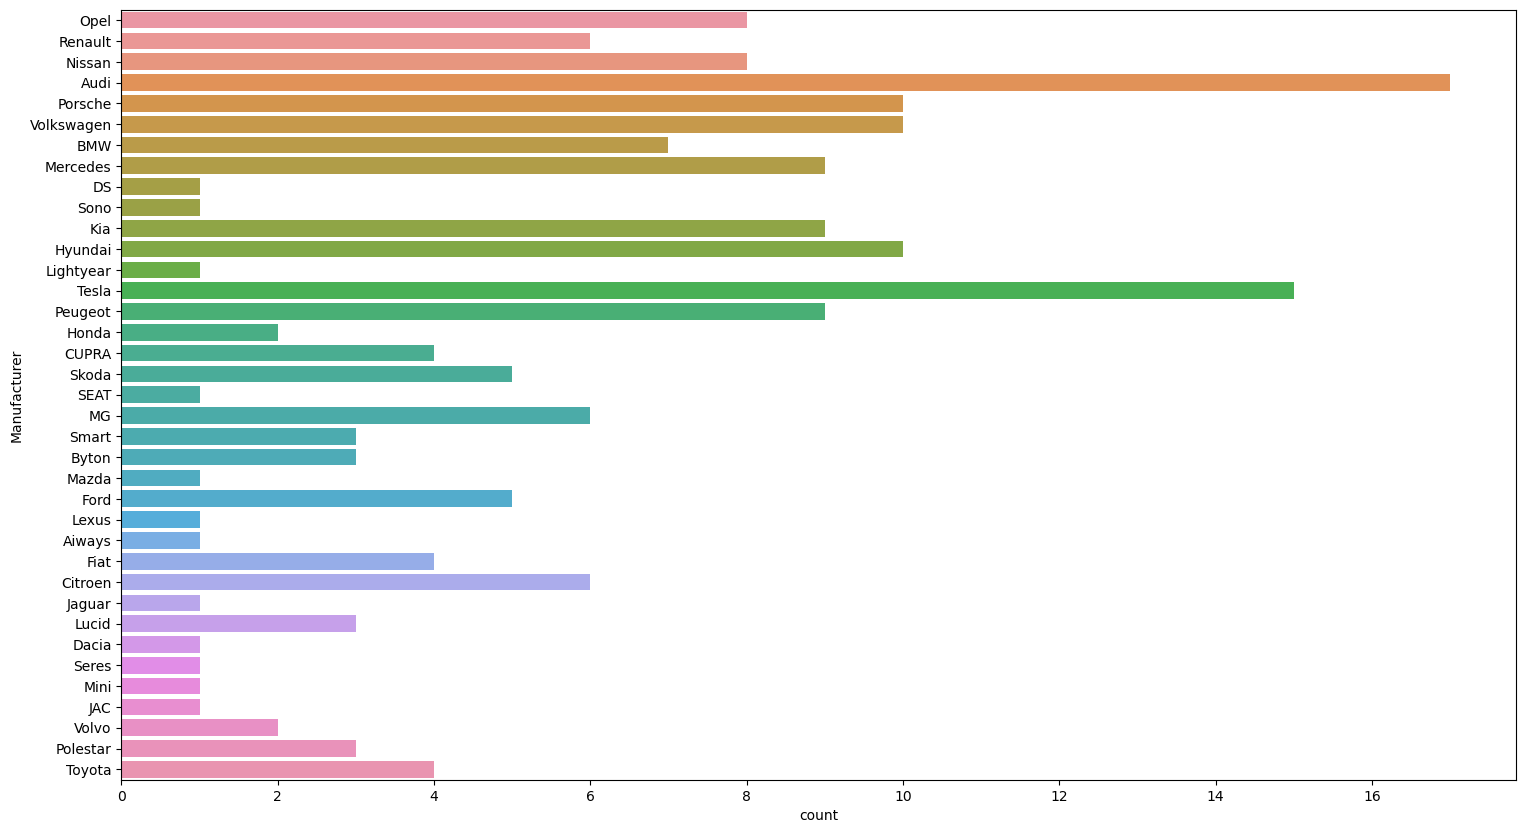

In [27]:
# the various car manufacturers.
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = df)

We can see that **Audi** and **Tesla** have the most types of electric vehicles.

## Audi

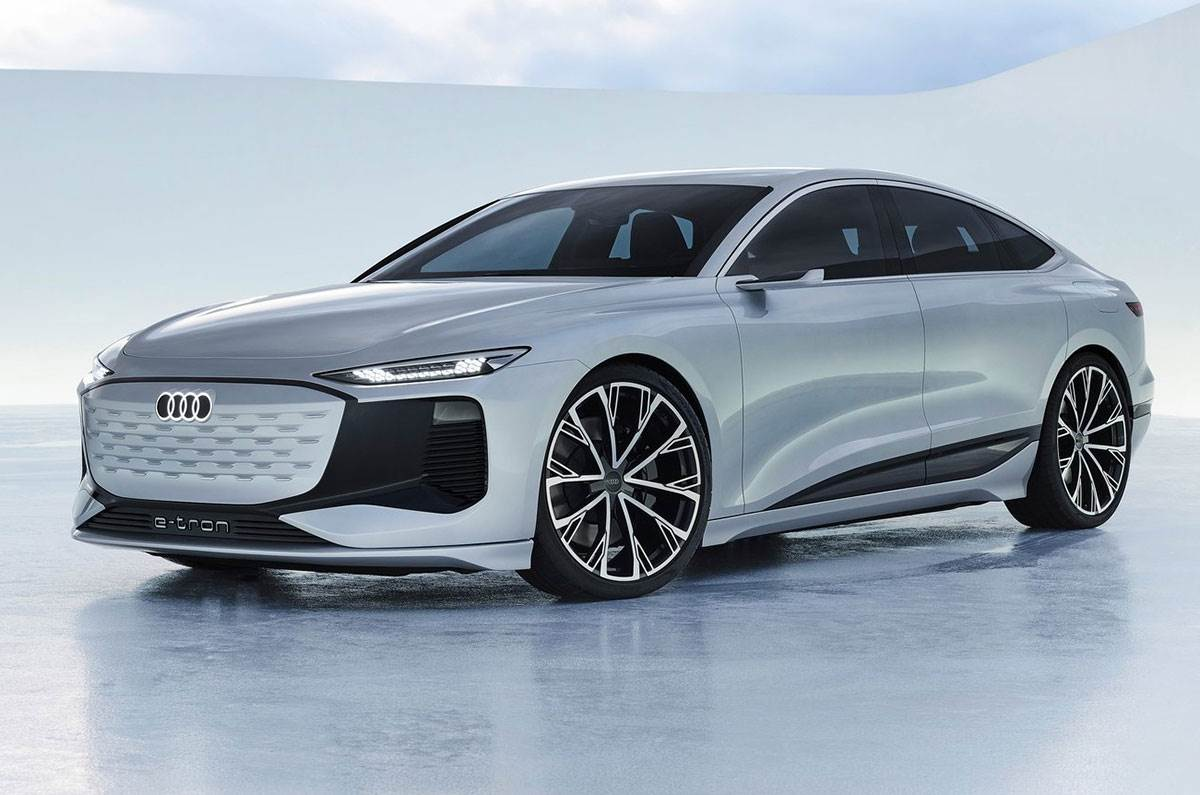

## Tesla

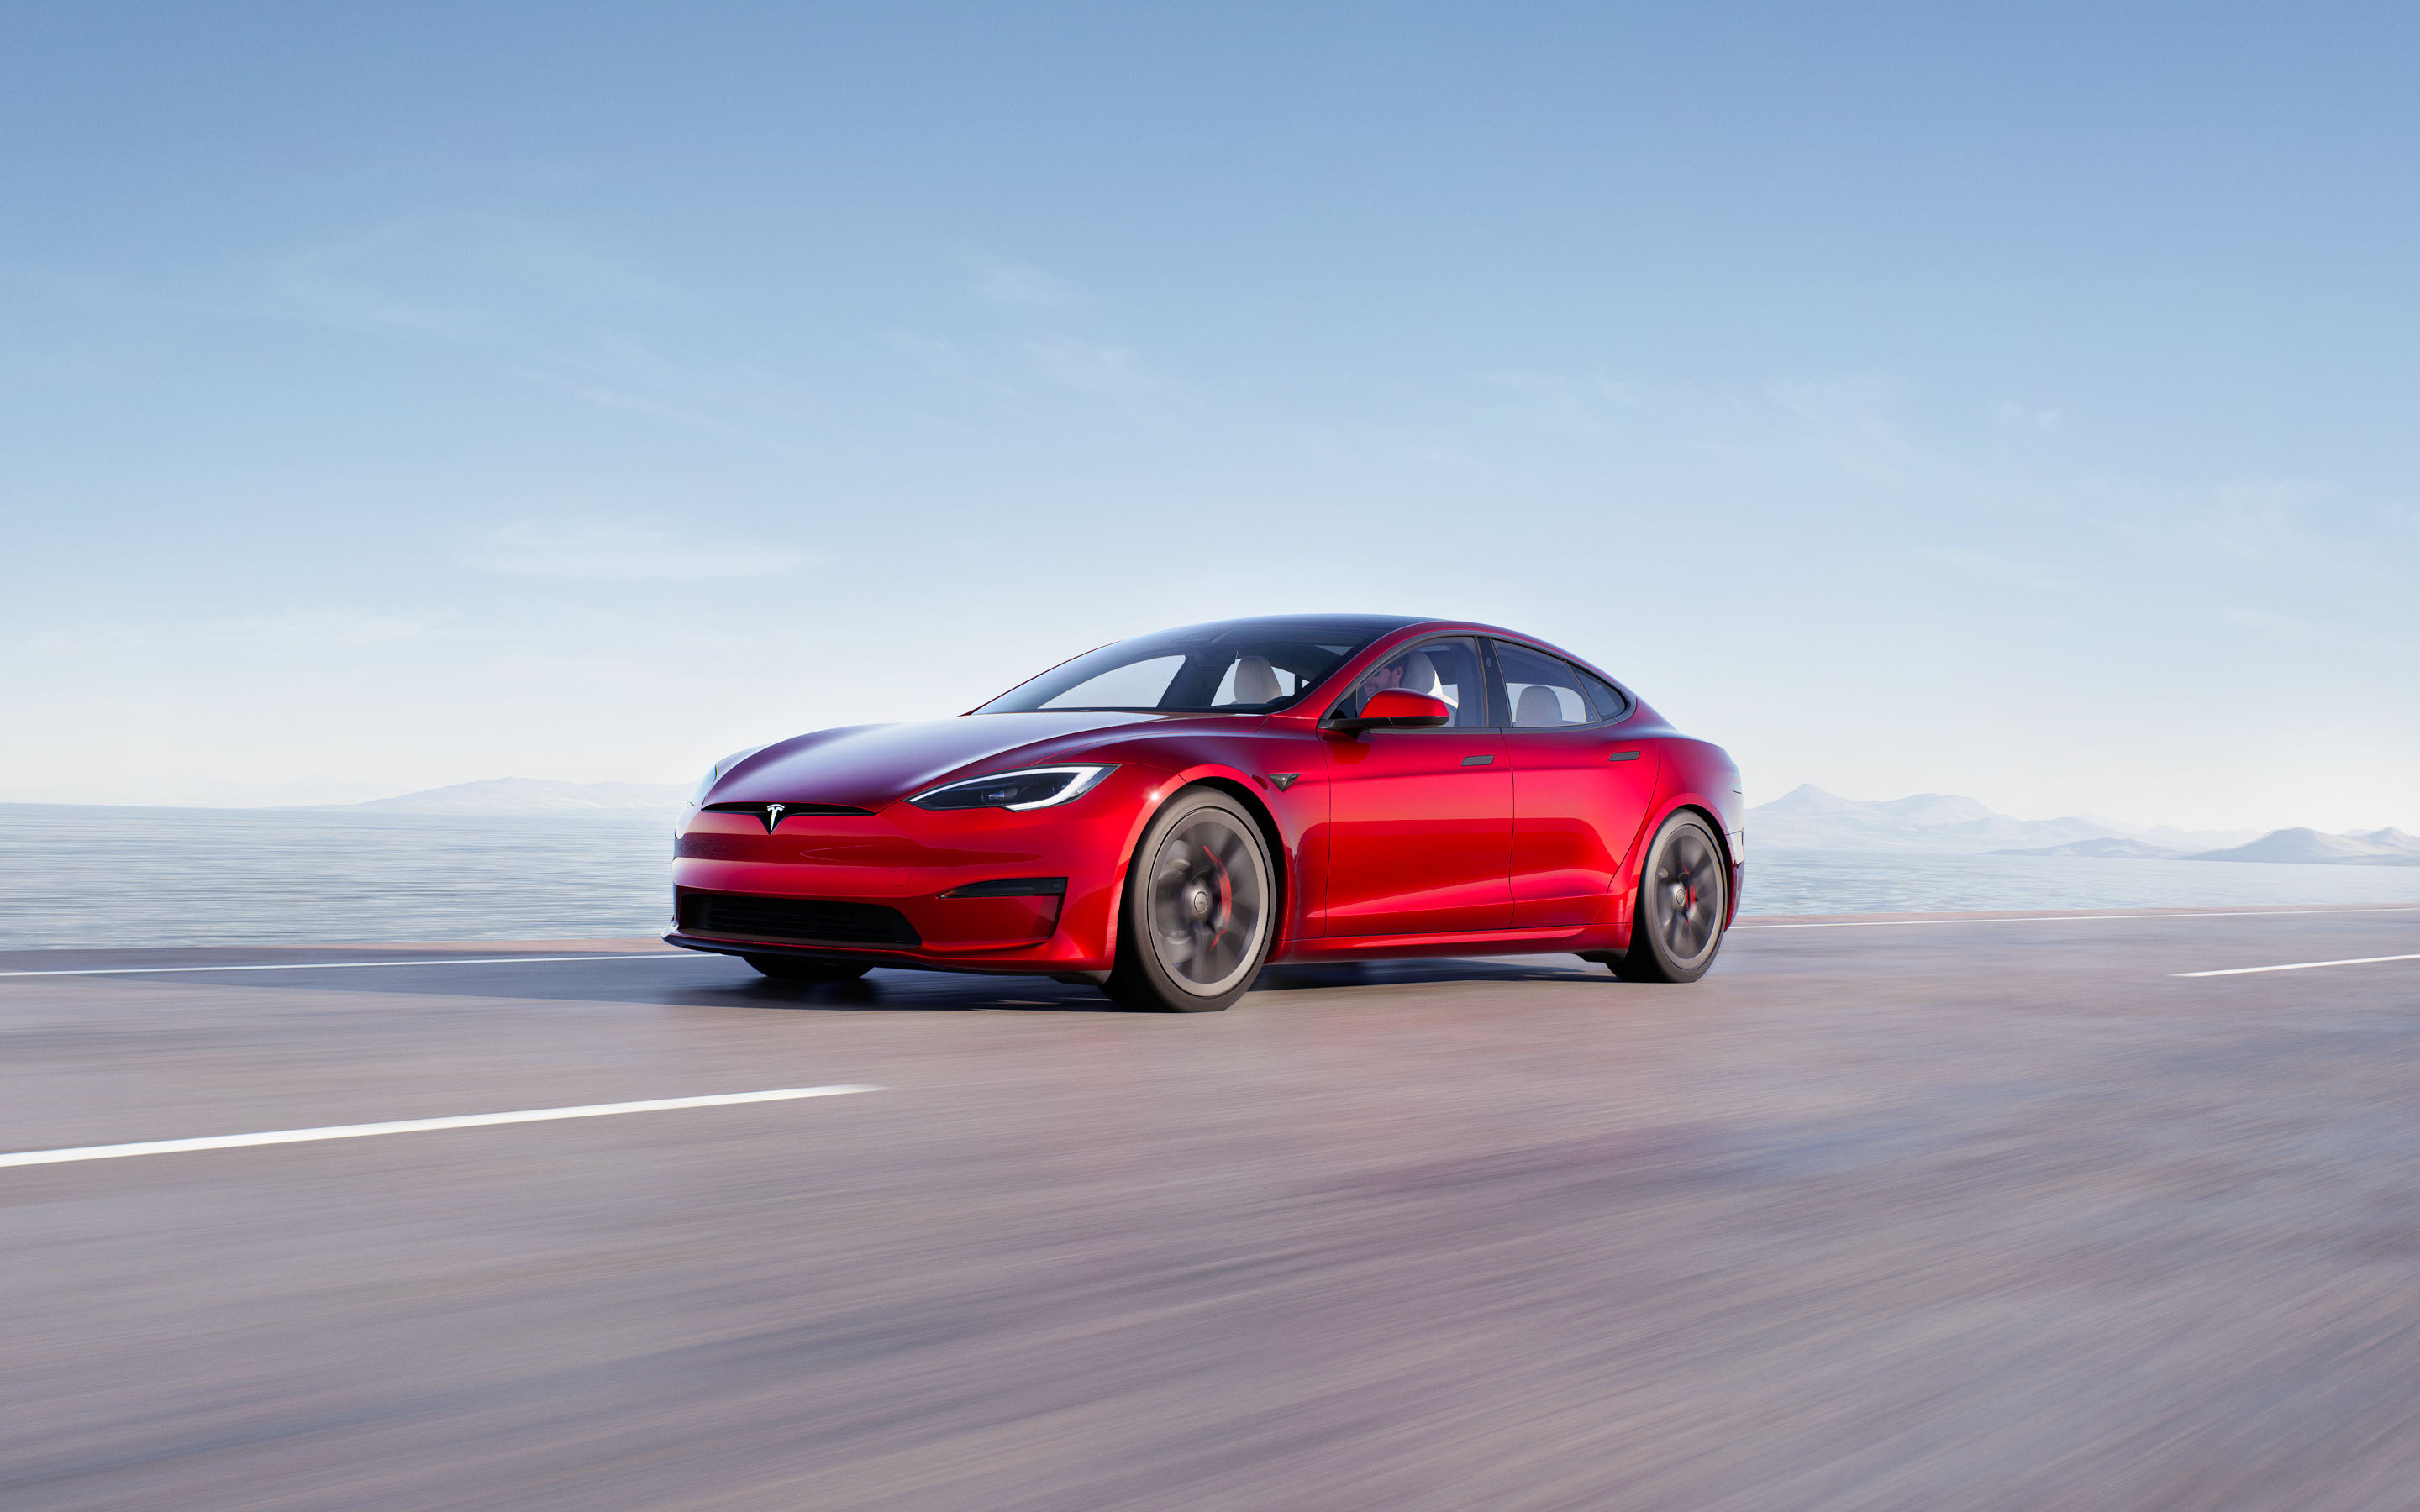

Now, we can plot some scatter relation plots to understand the data distribution.

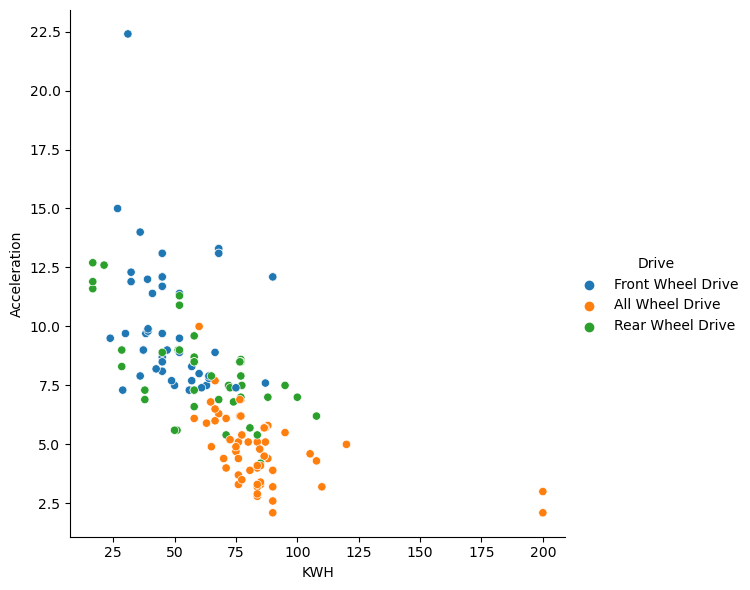

In [28]:
# the relation between acceleration and KWH capacity.
sns.relplot(x="KWH", y="Acceleration", height=6,hue="Drive",data=df)

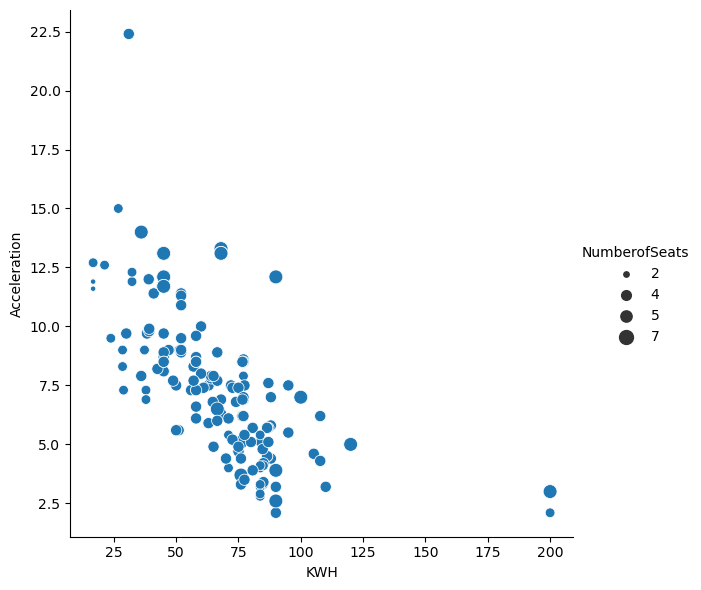

In [29]:
# add the factor of the number of seats.
sns.relplot(x="KWH", y="Acceleration", size="NumberofSeats", height=6,sizes=(15, 100),data=df)

We can see that the plots can help us understand the data distribution in a better way.

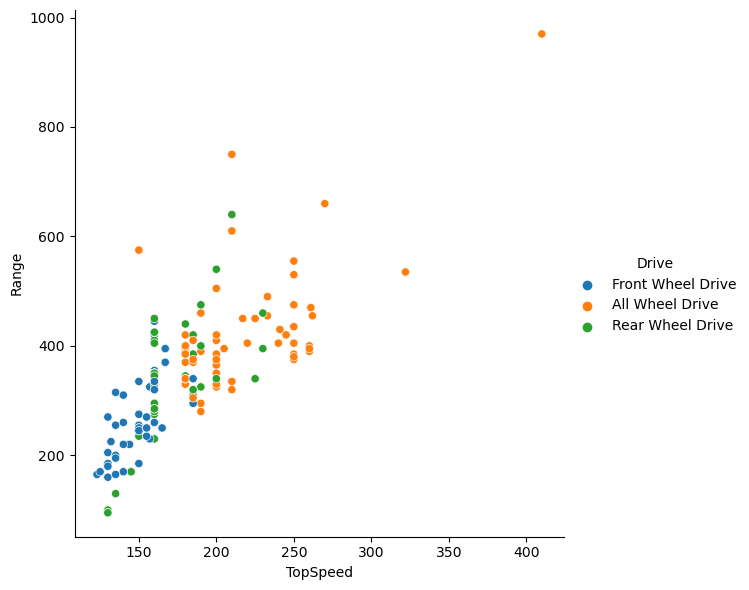

In [30]:
# plot the relation between Top Speed and Vehicle Range.
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=df)

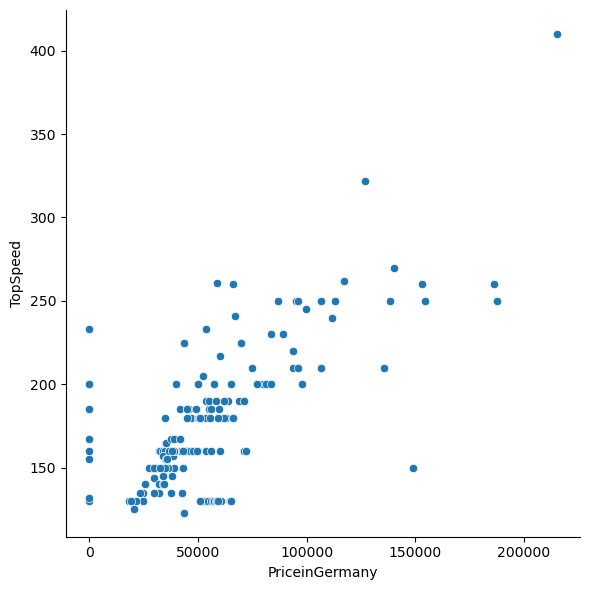

In [32]:
#relation between price and features
sns.relplot(x="PriceinGermany", y="TopSpeed", height=6,data=df)

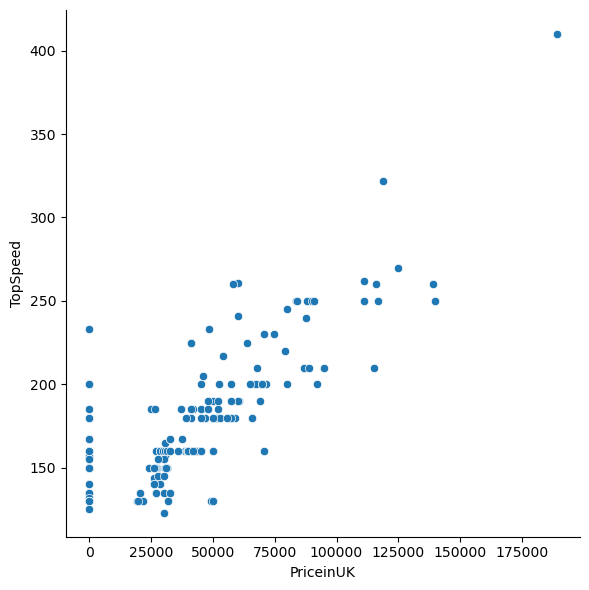

In [33]:
#relation between price and features
sns.relplot(x="PriceinUK", y="TopSpeed", height=6,data=df)

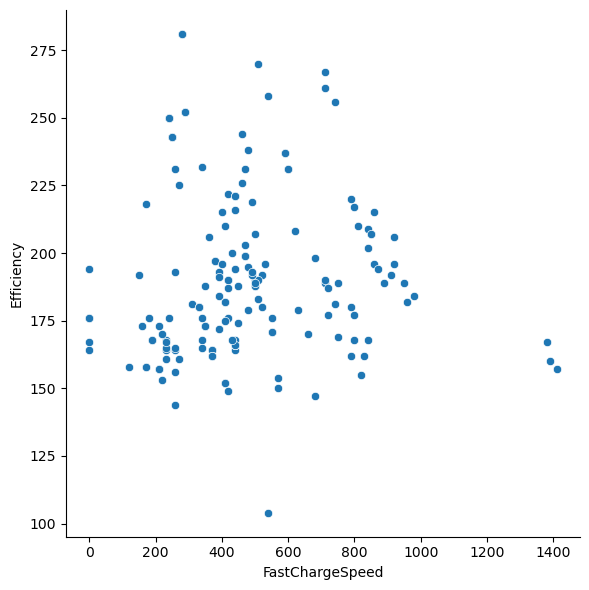

In [34]:
# the relationship between Fast Charge Speed and Efficiency.
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=df)

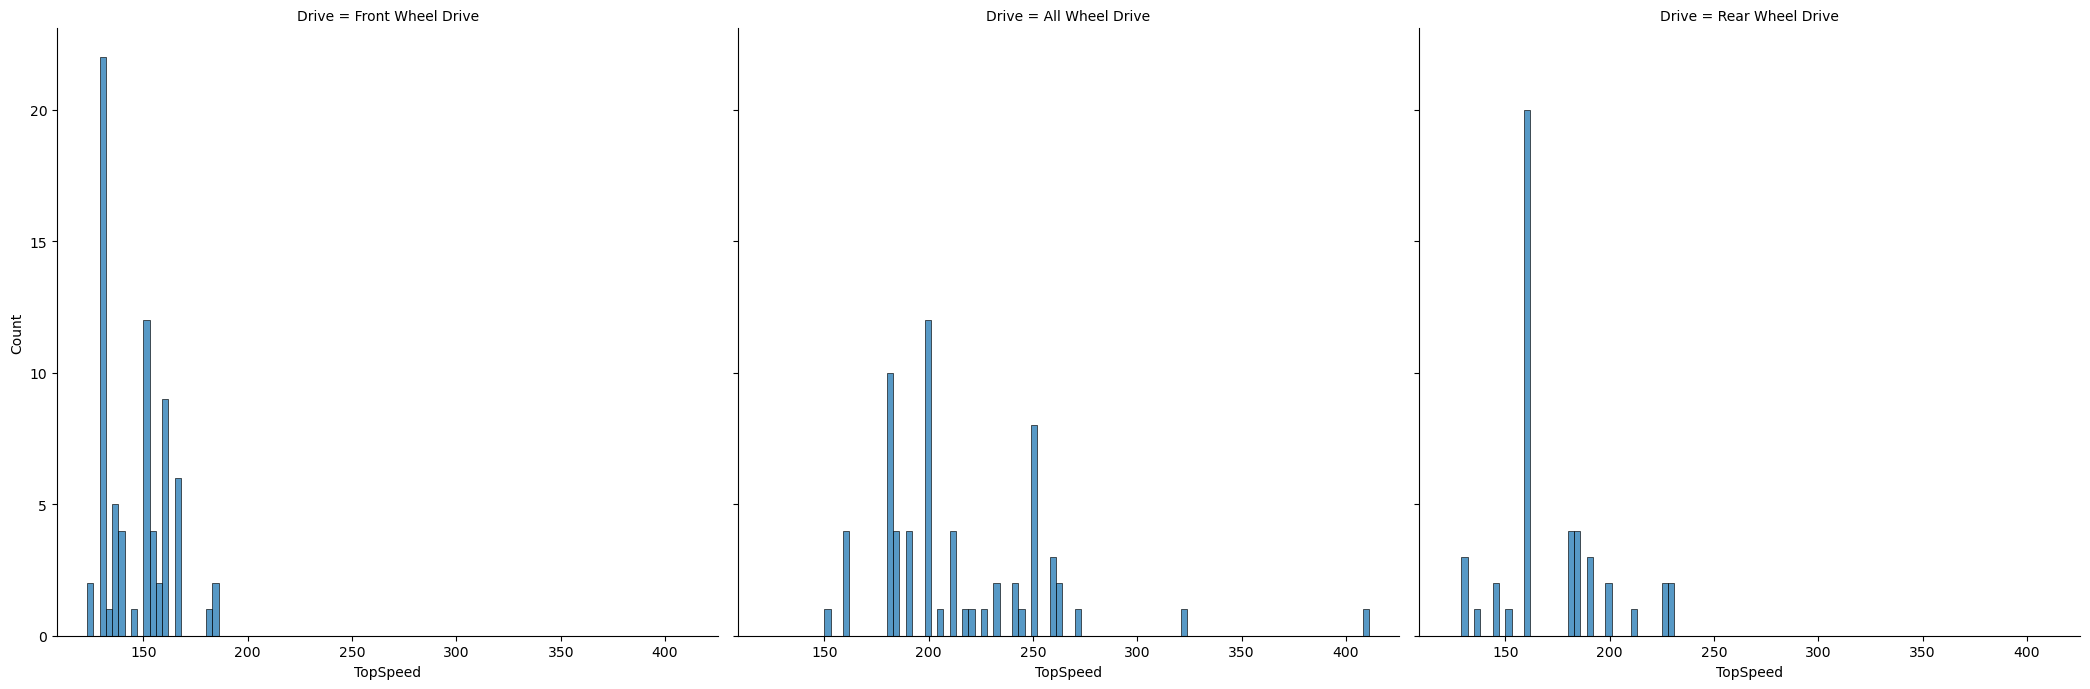

In [35]:
sns.displot(
    df, x="TopSpeed", col="Drive", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

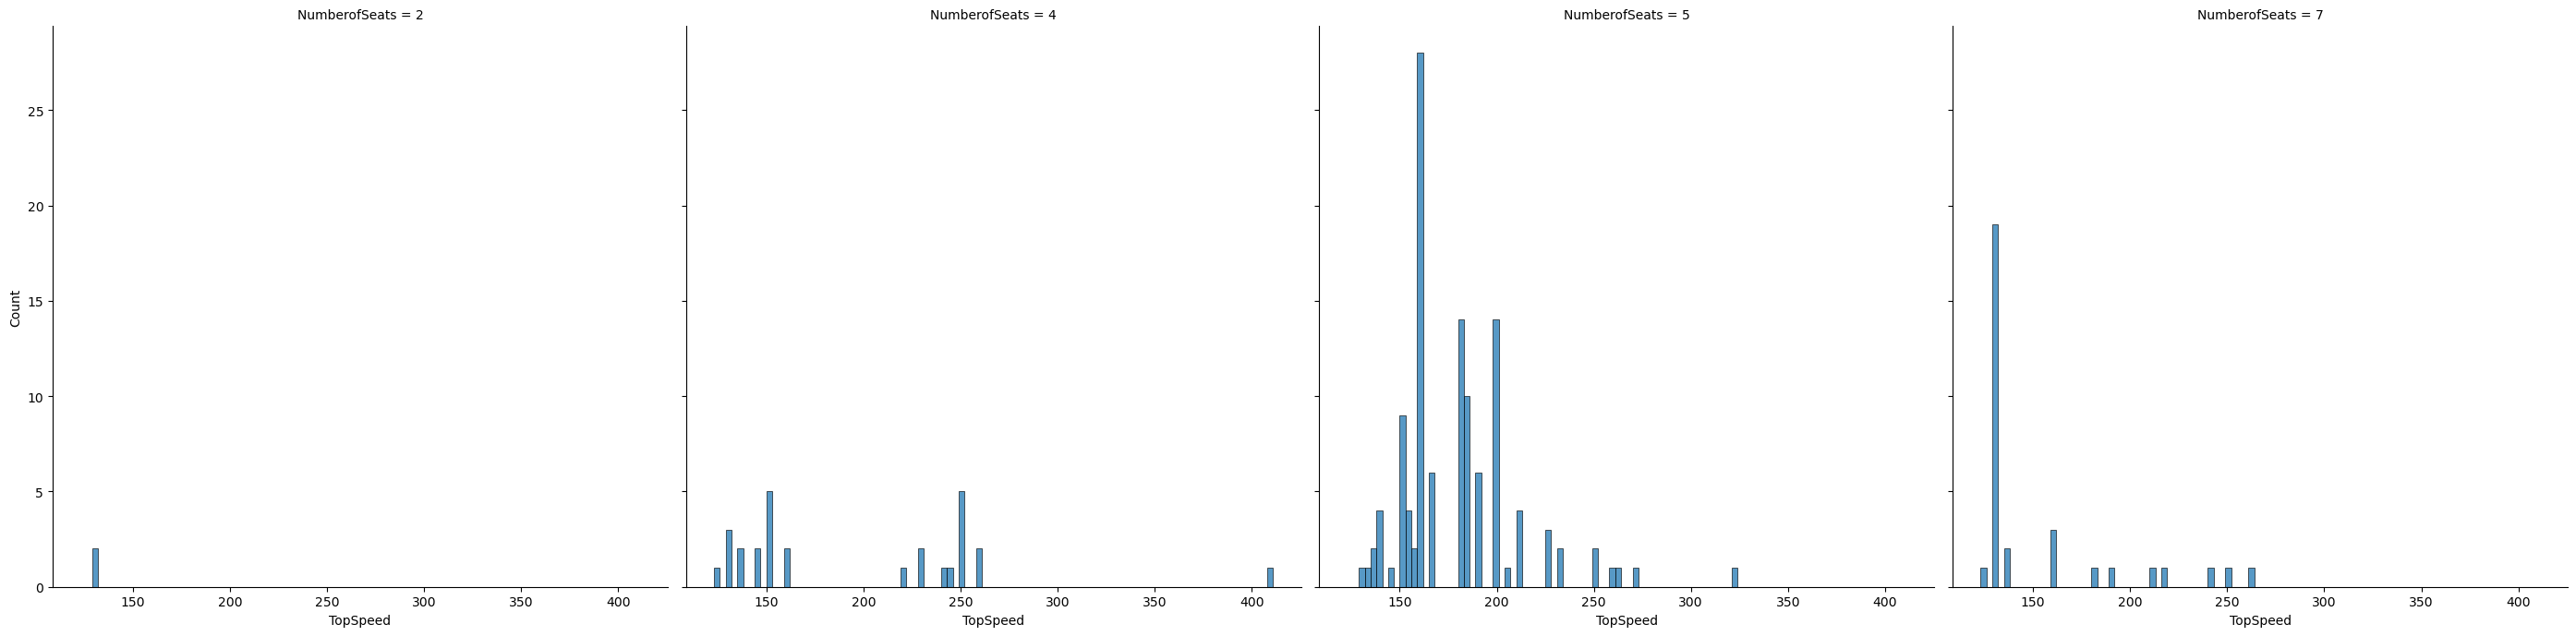

In [36]:
sns.displot(
    df, x="TopSpeed", col="NumberofSeats", 
    binwidth=3, height=7, facet_kws=dict(margin_titles=True),
)

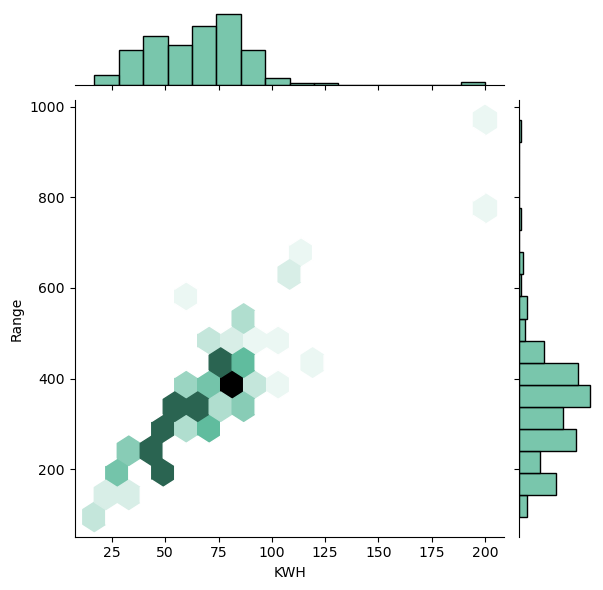

In [37]:
# a joint plot type
sns.jointplot(x=df["KWH"], y=df["Range"], kind="hex", color="#4CB391")

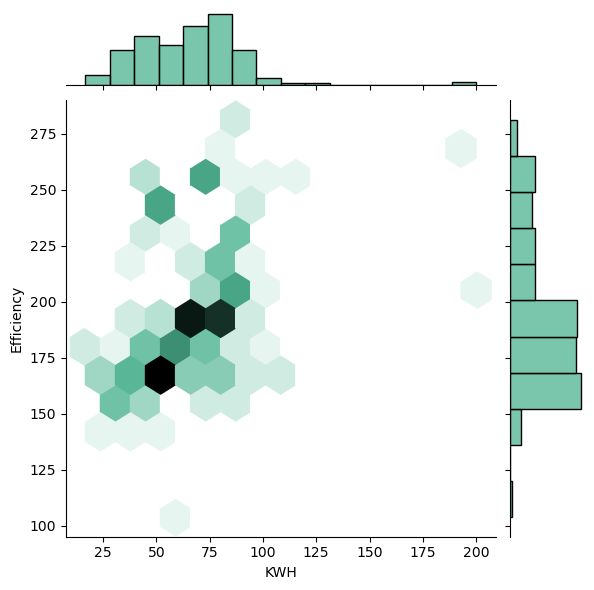

In [38]:
sns.jointplot(x=df["KWH"], y=df["Efficiency"], kind="hex", color="#4CB391")

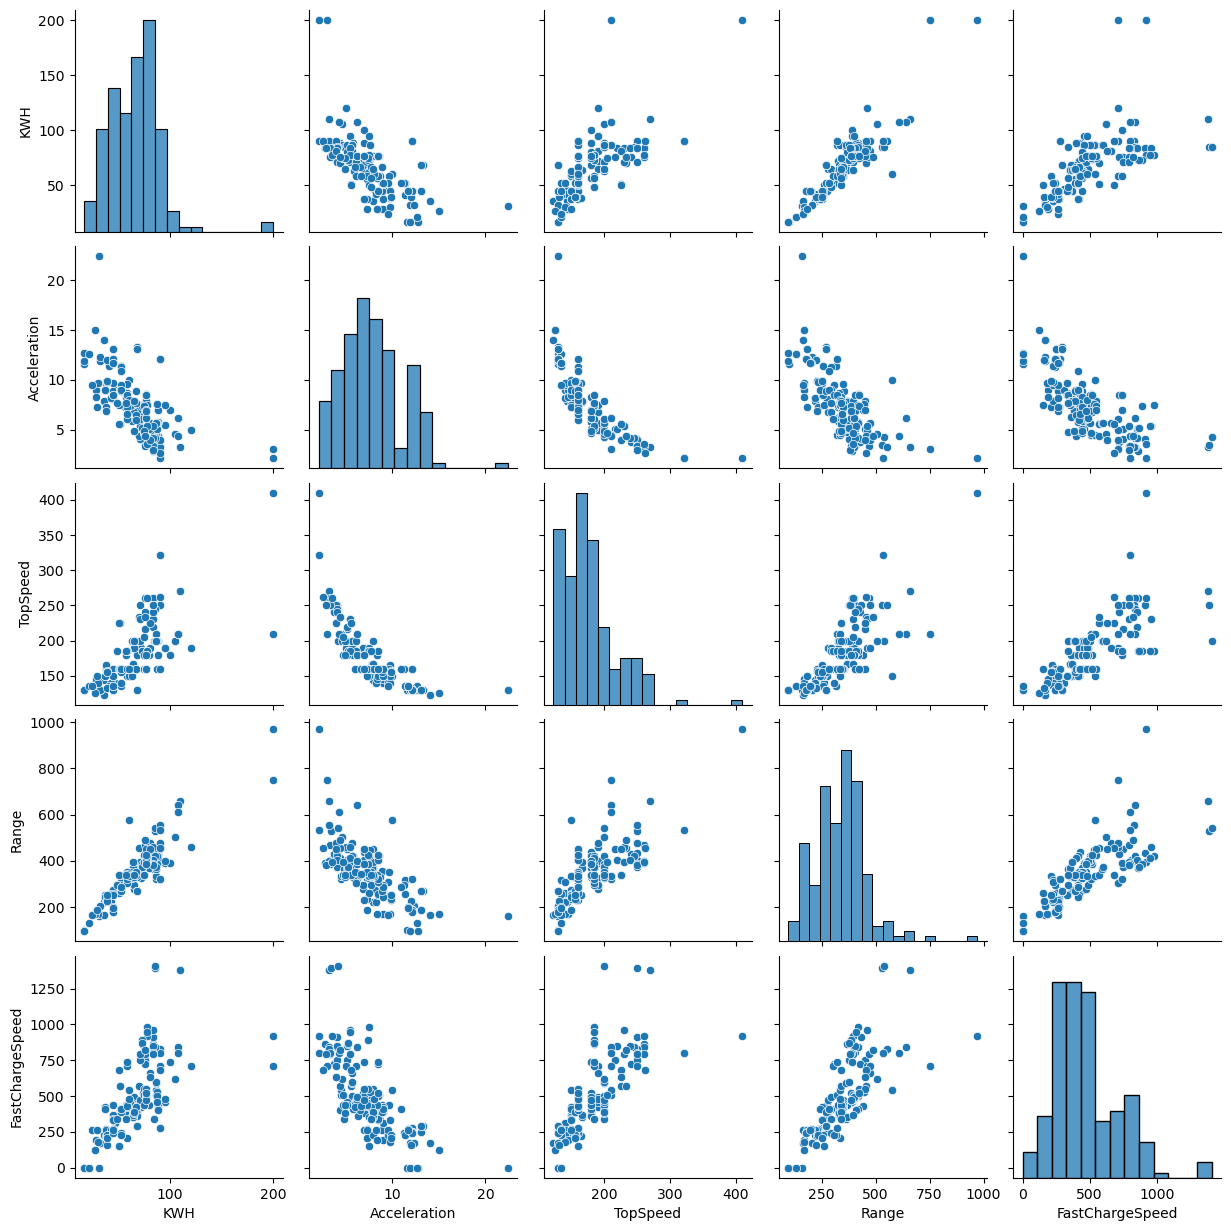

In [39]:
# a pair plot type
sns.pairplot(df[["KWH","Acceleration","TopSpeed","Range","FastChargeSpeed"]])

Various factors contribute to the prices of electric vehicles, a lot of parameters are also to be considered to buy electric vehicles. Let us now work on a Machine Learning model which can do the prediction.

## Machine Learning Model For Price Prediction of Electric Vehicles

We will predict the price of the vehicle based on all the parameters and data, one thing to be pointed is that many data points are missing. In, the case of vehicle prices, many vehicles have prices just in Pounds, and some have prices just in euros. So, for the sake of simplicity, we take only the prices in UK Pound.

Considering 1 Euro = 0.85 Pound

In [40]:
# the number of empty values in Pounds.
c=0
for i in range(0, len(df["PriceinUK"])):
    if (df["PriceinUK"][i]==0):
        c+=1
print('Empty Values:',c)

Empty Values: 44


As we will modify some data, we put this setting.

In [41]:
pd.options.mode.chained_assignment = None

In [43]:
# apply the conversion.
for i in range(0, len(df["PriceinUK"])):
    if (df["PriceinUK"][i]==0):
        val=df["PriceinGermany"][i]*0.85
        df["PriceinUK"][i]=val

In [44]:
df.head()

Name   KWH  Acceleration  TopSpeed  Range  \
0                    Opel Ampera-e   58.0           7.3       150    335   
1         Renault Kangoo Maxi ZE 33  31.0          22.4       130    160   
2                      Nissan Leaf   36.0           7.9       144    220   
3  Audi e-tron Sportback 55 quattro  86.5           5.7       200    375   
4            Porsche Taycan Turbo S  83.7           2.8       260    390   

   Efficiency  FastChargeSpeed              Drive  NumberofSeats  \
0         173              210  Front Wheel Drive              5   
1         194                0  Front Wheel Drive              5   
2         164              230  Front Wheel Drive              5   
3         231              600    All Wheel Drive              5   
4         215              860    All Wheel Drive              4   

   PriceinGermany  PriceinUK Manufacturer  
0           42990    36541.5         Opel  
1               0    31680.0      Renault  
2           29990    25995.0       Nissan  
3               0    79900.0         Audi  
4          186336   138830.0      Porsche

In [45]:
df['PriceinUK'] = df['PriceinUK'].astype(int)

In [46]:
df.head()

Name   KWH  Acceleration  TopSpeed  Range  \
0                    Opel Ampera-e   58.0           7.3       150    335   
1         Renault Kangoo Maxi ZE 33  31.0          22.4       130    160   
2                      Nissan Leaf   36.0           7.9       144    220   
3  Audi e-tron Sportback 55 quattro  86.5           5.7       200    375   
4            Porsche Taycan Turbo S  83.7           2.8       260    390   

   Efficiency  FastChargeSpeed              Drive  NumberofSeats  \
0         173              210  Front Wheel Drive              5   
1         194                0  Front Wheel Drive              5   
2         164              230  Front Wheel Drive              5   
3         231              600    All Wheel Drive              5   
4         215              860    All Wheel Drive              4   

   PriceinGermany  PriceinUK Manufacturer  
0           42990      36541         Opel  
1               0      31680      Renault  
2           29990      25995       Nissan  
3               0      79900         Audi  
4          186336     138830      Porsche

Now, all the values having 0 will be filled with appropriate values. Though this method of filling data is not appropriate, we use this for this case, as there are no other options.

In [48]:
# some data labelling.
import category_encoders as ce
train_df1=df
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
#fit and transform train data 
df1_train = encoder.fit_transform(train_df1) #Original data

So, basically, front-wheel drive is saved as 1, rear-wheel drive as 2 and all-wheel drive as 3. Basically, the reason is that data is as text, but is categorical data. Algorithms will not directly understand the text, so, we need to encode the text, so that ML algorithms are able to understand them.

In [49]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   KWH              180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int32  
 8   NumberofSeats    180 non-null    int64  
 9   PriceinGermany   180 non-null    int64  
 10  PriceinUK        180 non-null    int32  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 15.6+ KB


Except for vehicle name and manufacturer name, all else is a numeric value, so no problem in computing.

In [50]:
# the input data, which is taken as X.
X= df1_train.drop(['Name', 'PriceinGermany','PriceinUK','Manufacturer'], axis=1)
X=X.values

Basically, we are removing the strings and the target data to set the columns which can be used as input data.

In [51]:
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

So, we can see that it is a multidimensional array.

So, now we have to take in the target, that is “y”.

In [52]:
y=df1_train['PriceinUK'].values

Let us have a look at their dimensions once.

In [53]:
X.shape

(180, 8)

In [54]:
y.shape

(180,)

So, we can see that both have 180 data points.

## Model Selection

In [55]:
# proceeding to the train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

We kept the test set at 1/3rd of the data and 2/3rd of the data is train set.

In [56]:
# create a Random Forest Regressor model.
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

With, this the model has been fed with the data.

In [57]:
# the predictions.
y_pred= regressor.predict(X_test)

In [58]:
# a comparison between the test predictions and actual test data.
y_test

array([ 69905,  30730,  42000,  38845, 110980,  32550,  43248,  28420,
        48000,  45145,  28500,  48824,  49750,      0,  57500,  51531,
        49465,  45507,  41330,  25491,  45000,  88700,  74739,  59990,
        21675,  55577,  29740,  43265,  32150,  87820,      0,  54000,
        30500,  90980,  20495,  32121,  54850,  42075,  31500,  63905,
        28730,  48490,  45900,  91905,  49495,  60600,      0,  30594,
        45000,  87000, 118980,  65720,  30255,  30550,  43900,  41570,
        48195,  70665,  29750,  83580])

In [59]:
y_pred

array([ 54441.6325    ,  31066.27555556,  41380.        ,  45479.69333333,
       114520.10011111,  35399.57666667,  40735.42897222,  32830.70111111,
        54001.08666667,  54295.79666667,  31681.26083333,  49643.10804365,
        40735.42897222,  35409.45458333,  64010.02277778,  49643.10804365,
        46875.94537302,  44265.14      ,  47877.97145238,  26695.64938889,
        53521.39666667,  71343.52896032,  74522.66555556,  86362.50333333,
        31944.27194444,  49637.88687698,  33099.70666667,  50518.21761905,
        36664.97611111,  84756.28011111,  26485.26066667,  55484.98333333,
        33099.70666667,  81142.91716667,  23535.63061111,  36504.92666667,
        49637.88687698,  41719.56333333,  31008.96444444,  71014.14102381,
        33094.92033333,  53272.6       ,  54491.59777778,  64035.14169048,
        49643.10804365,  58952.72694444,  23120.55166667,  37367.93833333,
        48409.47016667,  70814.42507143, 127800.99333333,  53660.58111111,
        32744.97711111,  

Well, there are significant deviations, but the values are somewhat in a ballpark.

## Accuracy Metrics for Predicted Prices of Electric Vehicle

## Mean Absolute Error:

In [60]:
# Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7155.050407804233


## Mean Squared Error:

In [61]:
# Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  107902152.72013463


## Root Mean Squared Error:

In [62]:
# Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  10387.596099200942


## R Squared (R2):

In [63]:
# R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  0.815987092758551


So, we had a look at all the accuracy metrics.